In [1]:
from alphatools.research import run_pipeline, make_factor_plot, make_quantile_plot
from alphatools.ics import Sector, SubIndustry
from alphatools.fundamentals import Fundamentals
from zipline.pipeline.data import USEquityPricing as USEP
from zipline.pipeline.factors import Returns, AverageDollarVolume, CustomFactor
from zipline.pipeline import Pipeline




/home/ubuntu/anaconda3/envs/env_hca_live/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/env_hca_live/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


cur_folder= /home/ubuntu/hca/alphatools/alphatools/fundamentals
enac_fundamentals_pkl= /home/ubuntu/hca/alphatools/alphatools/fundamentals/sharadar_with_sid-mcap-de-2020-03-27.pkl


In [2]:
# Make a function with our pipline datasets to return our pipeline

def make_pipeline():  
    # Create the factors we want use
    fd=Fundamentals()
   
    market_cap =  fd.MarketCap.latest 
    de= fd.DE.latest 
    # Create a filter to select our 'universe'
    # Our universe is made up of stocks that have a non-null sentiment signal that was updated in  
    # the last day, are not within 2 days of an earnings announcement, are not announced acquisition  
    # targets, and are in the Q1500US.

    universe = ((de >5)
                & (market_cap >5e8) ) 

    # Create our pipeline columns and filter to just our universe
    # Note that the 'longs' and 'shorts' columns are boolean filters creted from factors
    pipe = Pipeline(  
        columns={  
            'de': de,  
            'mcap': market_cap,   
        },  
        screen=universe  
    )  
    return pipe  

In [6]:
start_date = '2016-08-01'
end_date = '2017-12-28'

dx = run_pipeline(make_pipeline(), start_date, end_date)


In [7]:
dx

de          mcap
2016-08-01 00:00:00+00:00 Equity(12 [AAL])         10.839  1.926765e+10
                          Equity(34 [ABBV])        10.570  1.011011e+11
                          Equity(35 [ABC])         13.830  1.683667e+10
                          Equity(36 [ABCB])         9.149  1.071063e+09
                          Equity(47 [ABG])          9.802  1.331161e+09
                          Equity(179 [ADP])        10.353  3.938098e+10
                          Equity(184 [ADS])        11.754  1.180210e+10
                          Equity(214 [AEL])        21.943  1.163486e+09
                          Equity(227 [AES])         9.596  7.354453e+09
                          Equity(238 [AF])          7.933  1.502847e+09
                          Equity(247 [AFG])         9.695  6.140576e+09
                          Equity(253 [AFL])         5.382  2.832913e+10
                          Equity(290 [AGNC])        7.146  6.149971e+09
                          Equity(335 [AHT])         5.317  5.664640e+08
                          Equity(380 [AIZ])         5.635  5.340819e+09
                          Equity(419 [ALDW])        5.349  6.188494e+08
                          Equity(450 [ALLE])       15.824  6.979453e+09
                          Equity(457 [ALLY])       10.322  8.209164e+09
                          Equity(514 [AMBC])       12.443  6.928228e+08
                          Equity(528 [AMCX])       50.661  4.885196e+09
                          Equity(550 [AMID])        7.290  5.822212e+08
                          Equity(564 [AMP])        19.128  1.530754e+10
                          Equity(671 [APA])         7.000  2.038025e+10
                          Equity(675 [APAM])        7.294  1.325814e+09
                          Equity(701 [APO])         5.777  3.156334e+09
                          Equity(767 [ARES])       14.634  1.140965e+09
                          Equity(808 [ARR])         9.354  7.723812e+08
                          Equity(838 [ASB])         8.938  2.802400e+09
                          Equity(1034 [AWI])        7.384  2.356966e+09
                          Equity(1041 [AX])        10.795  1.280763e+09
...                                                   ...           ...
2017-12-28 00:00:00+00:00 Equity(9663 [TNP-PB])    12.931  2.477845e+09
                          Equity(9779 [TRT])        5.060  3.210154e+09
                          Equity(9825 [TSRI])       6.011  5.144375e+10
                          Equity(9900 [TWOC])       6.006  2.708071e+09
                          Equity(10006 [UMPQ])      8.650  3.627345e+09
                          Equity(10013 [UNF])       5.448  4.530167e+09
                          Equity(10025 [UNVR])      5.753  1.187691e+10
                          Equity(10042 [URI])      26.386  1.007105e+11
                          Equity(10049 [USAS])      5.216  1.220580e+10
                          Equity(10060 [USCR])      8.412  9.069119e+10
                          Equity(10090 [UUU])       5.082  7.383287e+08
                          Equity(10178 [VIAV])      7.708  1.434693e+09
                          Equity(10224 [VLYPO])     5.266  2.907374e+09
                          Equity(10369 [WAFD])    374.748  5.519329e+09
                          Equity(10376 [WALK])      6.605  2.962852e+09
                          Equity(10382 [WATT])      8.285  5.933817e+09
                          Equity(10386 [WB])        9.789  9.480094e+08
                          Equity(10421 [WEBK])      5.320  1.697988e+09
                          Equity(10437 [WEX])       7.842  3.511853e+09
                          Equity(10450 [WFC-PR])    8.392  2.774821e+11
                          Equity(10490 [WING])      7.641  8.571783e+08
                          Equity(10549 [WOR])       6.039  1.498121e+09
                          Equity(10559 [WPG-PI])   13.388  1.222096e+10
                          Equity(10606 [WSO])       8.280  1.483172e+09
                       

In [3]:
fd=Fundamentals()
   
market_cap =  fd.MarketCap.latest 
de= fd.DE.latest 
    # Create a filter to select our 'universe'
    # Our universe is made up of stocks that have a non-null sentiment signal that was updated in  
    # the last day, are not within 2 days of an earnings announcement, are not announced acquisition  
    # targets, and are in the Q1500US.

universe = ((de >5)
                & (market_cap >5e8) ) 

Fundamentals.MarketCap.latest.zscore()

import zipline.pipeline.filters as zfilt
#help(zfilt.StaticAssets)


In [4]:
#p = Pipeline(screen=sid.eq(8))
p = Pipeline(screen=universe)
#p.add(USEP.close.latest, "Price")
#p.add(my_factor, '5d_MR_Sector_Neutral_Rank')
#p.add(Fundamentals.MarketCap.latest.zscore(), 'MCAP')

p.add(Fundamentals.MarketCap.latest   , 'MarketCap')
p.add(Fundamentals.MarketCap.latest.zscore()   , 'MarketCapZscore')
p.add(Fundamentals.DE.latest, 'de')
#p.add(sid,'sid')
start_date = '2016-08-01'
end_date = '2017-12-28'

df = run_pipeline(p, start_date, end_date)


In [5]:
df


MarketCap  \
2016-08-01 00:00:00+00:00 Equity(12 [AAL])        1.926765e+10   
                          Equity(34 [ABBV])       1.011011e+11   
                          Equity(35 [ABC])        1.683667e+10   
                          Equity(36 [ABCB])       1.071063e+09   
                          Equity(47 [ABG])        1.331161e+09   
                          Equity(179 [ADP])       3.938098e+10   
                          Equity(184 [ADS])       1.180210e+10   
                          Equity(214 [AEL])       1.163486e+09   
                          Equity(227 [AES])       7.354453e+09   
                          Equity(238 [AF])        1.502847e+09   
                          Equity(247 [AFG])       6.140576e+09   
                          Equity(253 [AFL])       2.832913e+10   
                          Equity(290 [AGNC])      6.149971e+09   
                          Equity(335 [AHT])       5.664640e+08   
                          Equity(380 [AIZ])       5.340819e+09   
                          Equity(419 [ALDW])      6.188494e+08   
                          Equity(450 [ALLE])      6.979453e+09   
                          Equity(457 [ALLY])      8.209164e+09   
                          Equity(514 [AMBC])      6.928228e+08   
                          Equity(528 [AMCX])      4.885196e+09   
                          Equity(550 [AMID])      5.822212e+08   
                          Equity(564 [AMP])       1.530754e+10   
                          Equity(671 [APA])       2.038025e+10   
                          Equity(675 [APAM])      1.325814e+09   
                          Equity(701 [APO])       3.156334e+09   
                          Equity(767 [ARES])      1.140965e+09   
                          Equity(808 [ARR])       7.723812e+08   
                          Equity(838 [ASB])       2.802400e+09   
                          Equity(1034 [AWI])      2.356966e+09   
                          Equity(1041 [AX])       1.280763e+09   
...                                                        ...   
2017-12-28 00:00:00+00:00 Equity(9663 [TNP-PB])   2.477845e+09   
                          Equity(9779 [TRT])      3.210154e+09   
                          Equity(9825 [TSRI])     5.144375e+10   
                          Equity(9900 [TWOC])     2.708071e+09   
                          Equity(10006 [UMPQ])    3.627345e+09   
                          Equity(10013 [UNF])     4.530167e+09   
                          Equity(10025 [UNVR])    1.187691e+10   
                          Equity(10042 [URI])     1.007105e+11   
                          Equity(10049 [USAS])    1.220580e+10   
                          Equity(10060 [USCR])    9.069119e+10   
                          Equity(10090 [UUU])     7.383287e+08   
                          Equity(10178 [VIAV])    1.434693e+09   
                          Equity(10224 [VLYPO])   2.907374e+09   
                          Equity(10369 [WAFD])    5.519329e+09   
                          Equity(10376 [WALK])    2.962852e+09   
                          Equity(10382 [WATT])    5.933817e+09   
                          Equity(10386 [WB])      9.480094e+08   
                          Equity(10421 [WEBK])    1.697988e+09   
                          Equity(10437 [WEX])     3.511853e+09   
                          Equity(10450 [WFC-PR])  2.774821e+11   
                          Equity(10490 [WING])    8.571783e+08   
                          Equity(10549 [WOR])     1.498121e+09   
                          Equity(10559 [WPG-PI])  1.222096e+10   
                          Equity(10606 [WSO])     1.483172e+09   
                          Equity(10640 [WW])      9.222592e+09   
                          Equity(10658 [XAN])     1.057947e+10   
                          Equity(10660 [XBIO])    1.570414e+10   
                          Equity(10751 [YEWB])    1.817804e+09   
                          Equity(10824 [ZIOP])    8.896588e+09   
                          E

In [16]:
#universe = AverageDollarVolume(window_length=120).top(500)
#from zipline.pipeline.filters import  StaticAssets
#security_list = StaticAssets(symbols(['AAPL']))
#from zipline.api import symbol, symbols
#from zipline.pipeline.filters import  StaticAssets

#aapl = symbols('AAPL') 
#aapl_ibm = StaticAssets(symbol(['AAPL', 'IBM']))  

In [5]:
universe = AverageDollarVolume(window_length=120).top(500)
my_factor = (
    -Returns(mask=universe, window_length=5).
    demean(groupby=Sector()).
    rank()
)

p = Pipeline(screen=universe)
p.add(USEP.close.latest, "Price")
#p.add(my_factor, '5d_MR_Sector_Neutral_Rank')
p.add(Fundamentals.MarketCap.latest.zscore(), 'MCAPZscore')
p.add(Fundamentals.MarketCap.latest   , 'MCAP')
p.add(Fundamentals.PriceToBook.latest, 'PB')

start_date = '2016-08-01'
end_date = '2018-12-28'

df = run_pipeline(p, start_date, end_date)


In [8]:
df[df.MCAP >0]

,,MCAP,MCAPZscore,PB,Price


In [9]:
p.columns

{'Price': Latest([USEquityPricing.close], 1),
 'MCAPZscore': GroupedRowTransform([Latest(...), Everything(...)], 0),
 'MCAP': Latest([Fundamentals.MarketCap], 1),
 'PB': Latest([Fundamentals.PriceToBook], 1)}

In [ ]:
df

In [ ]:
class MyFactor(CustomFactor):
    inputs = [Sector(), SubIndustry()]
    window_length=1
    
    def compute(self, today, assets, out, dat, dat2):
        out[:] = dat2[-1]




In [ ]:
p = Pipeline(screen=universe  )
p.add(MyFactor(), "MyFactor")
p.add(Sector(), "Sector")
#p.add(Fundamentals.MarketCap.latest, "MarketCap")
start_date = '2017-01-04'
end_date = '2017-12-28'

df = run_pipeline(p, start_date, end_date)

In [ ]:
#df=df[!df.MarketCap.isnull)]
#df=df[~(df.MarketCap.isna())]
len(df)

/home/ubuntu/hca/alphatools/alphatools/research/research.py:119: FutureWarning: offset is deprecated. Use freq instead
  end_dt = pd.Timestamp(end_date, tz='UTC', offset='C')
/home/ubuntu/hca/alphatools/alphatools/research/research.py:120: FutureWarning: offset is deprecated. Use freq instead
  start_dt = pd.Timestamp(start_date, tz='UTC', offset='C')


Formatting factor data for: de
Dropped 0.6% entries from factor data: 0.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: mcap
Dropped 0.6% entries from factor data: 0.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 1.13 secs
Time to generate long/short returns: 0.71 secs


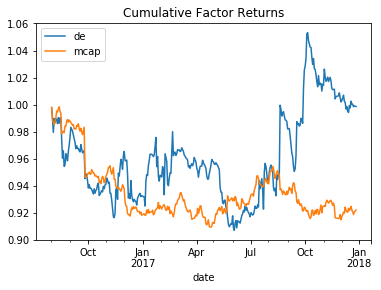

In [8]:
make_factor_plot(dx, start_date, end_date);

Formatting factor data for: de
Dropped 0.6% entries from factor data: 0.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Formatting factor data for: mcap
Dropped 0.6% entries from factor data: 0.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 1.31 secs


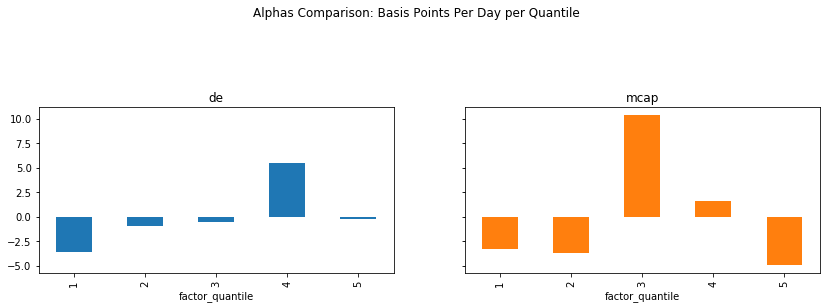

In [9]:
make_quantile_plot(dx, start_date, end_date);